Example 2.5
===========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which provides a function for drawing heatmaps of the correlations between columns of a pandas dataframe. If you are using Colab please refer to the next cell which shows how to load a remote version of the module and data.

In [2]:
assert path.exists('heatmap.py')
from heatmap import correlation_heatmap

If you are running this notebook somewhere without access to `heatmap.py` then the following snippet will download a copy of it and use that.

In [19]:
assert not path.exists('heatmap.py')

import requests

heatmap_py_url = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/heatmap.py'
req = requests.get(heatmap_py_url)

with open('urlheatmap.py', 'w') as f:
    f.write(req.text)
    
from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this notebook we will be looking at the miles per gallon (MPG) achieved by these cars based on some features of the cars and where/when they were produced. The `origin` of the car is encoded as an integer, (recall you can use the `dtypes` method to see this). The representation of the data is clearer by mapping it to a string describing the origin.

In [3]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/data-auto.csv'
df = pd.read_csv(data_csv)

In [4]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [5]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7] 

A heatmap of the correlations between the variables in the data is a good way to get a feel for the data.

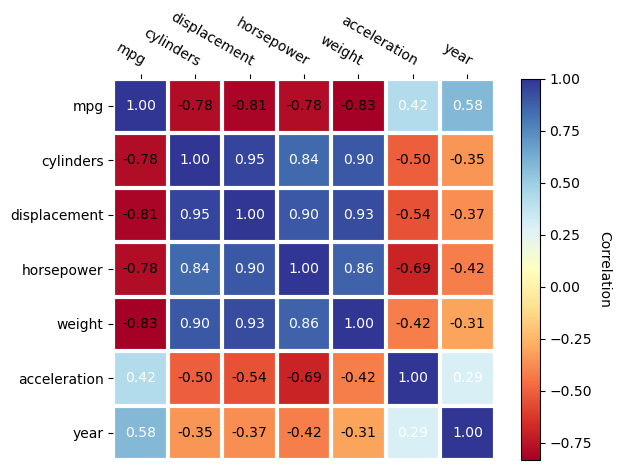

In [6]:
correlation_heatmap(df[numeric_cols])
plt.show()

<Figure size 640x480 with 0 Axes>

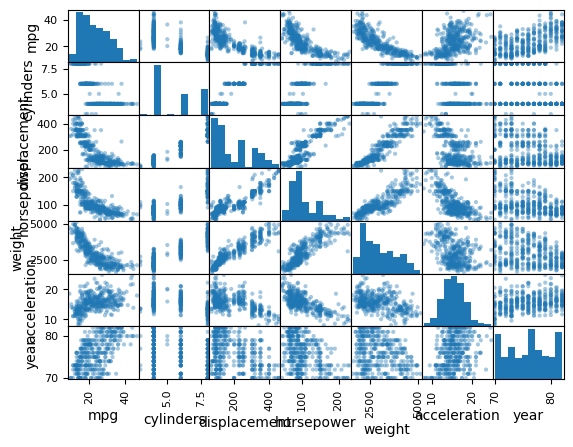

In [7]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

### Question

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?

#### Answer
They all seem to be positively correlated with each other. Furthermore, they exhibit non-linear relationships witht the target variable

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time?

In [9]:
# fit a linear model with all variables
lm = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          1.79e-139
Time:                        09:50:22   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677  

It seems that there has been an increase in MPG over time, which is expected from increased fuel efficiency. 

### Question

Plot the residuals against the fitted values, what do you notice?

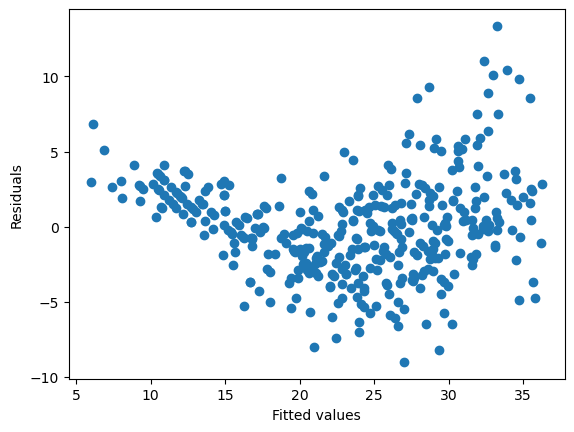

In [10]:
# plot residuals vs. fitted values
plt.figure()
plt.scatter(lm.fittedvalues, lm.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The fit seems to break quite a few assumptions. For instance, there is some U-shaped non-linearity as well as some heteroscedasticity for larger values. 

### Question

Did you get any warnings when you fitted the model? How might you resolve them?

#### Answer
There was a warning about a high condition number which implies covariance 

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response.

<Figure size 640x480 with 0 Axes>

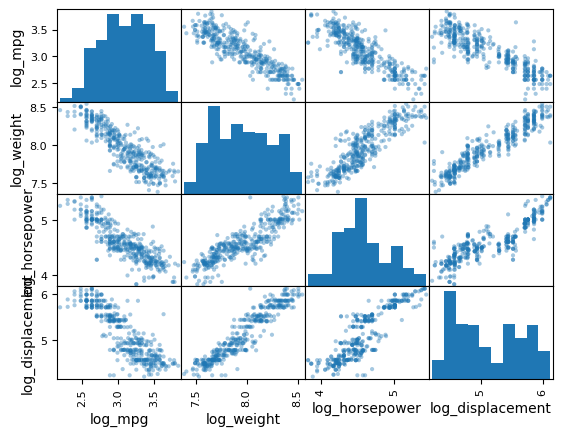

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     390.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          6.11e-179
Time:                        10:03:14   Log-Likelihood:                 301.10
No. Observations:                 392   AIC:                            -584.2
Df Residuals:                     383   BIC:                            -548.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0075      0.374  

In [16]:
# log transform to reduce non-linearity
df["log_mpg"] = np.log(df.mpg)
df["log_weight"] = np.log(df.weight)
df["log_horsepower"] = np.log(df.horsepower)
df["log_displacement"] = np.log(df.displacement)
# plot log_mpg vs. predictors
plt.figure()
pd.plotting.scatter_matrix(df[["log_mpg", "log_weight", "log_horsepower", "log_displacement"]], alpha = 0.4)
plt.show()


### Question

Re-fit the model with the transformed variables and comment on what has changed. Do you need all of the variables?

In [17]:

# fit a new linear mdoel with log transformed variables
loglm = smf.ols(formula = 'log_mpg ~ log_weight + log_horsepower + log_displacement + cylinders + acceleration + year + origin', data = df).fit()
print(loglm.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     390.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          6.11e-179
Time:                        10:03:45   Log-Likelihood:                 301.10
No. Observations:                 392   AIC:                            -584.2
Df Residuals:                     383   BIC:                            -548.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0075      0.374  

Well, one could use some kind of ridge regression / stepwise selection magic as long as Fox is not too near. 

In [24]:
# lasso regression
lasso = smf.ols(formula = 'log_mpg ~ log_weight + log_horsepower + log_displacement + cylinders + acceleration + year + origin', data = df).fit_regularized(alpha = 0.1, L1_wt = 1)

significant_params = lasso.params[lasso.params != 0].index

# fit model with only significant parameters
lasso_lm = smf.ols(formula = 'log_mpg ~ ' + ' + '.join(significant_params), data = df).fit()
print(lasso_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     733.3
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          4.12e-179
Time:                        10:08:35   Log-Likelihood:                 288.39
No. Observations:                 392   AIC:                            -566.8
Df Residuals:                     387   BIC:                            -546.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4004      0.345     21.436   

### Question

Include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?